<a href="https://colab.research.google.com/github/ABHISHEK2334/ABHISHEK-/blob/main/polynomial_reg_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

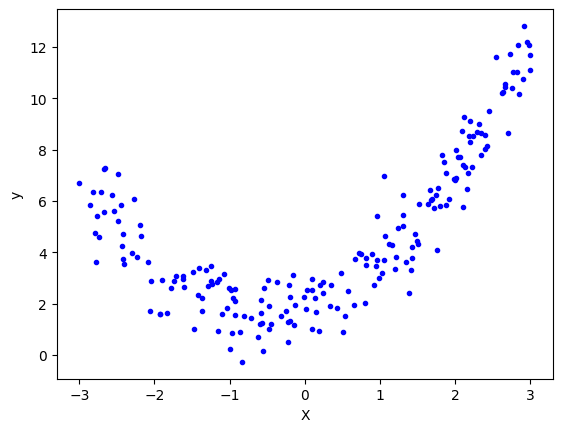

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression,SGDRegressor

from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline
X = 6 * np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200, 1)

plt.plot(X, y,'b.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

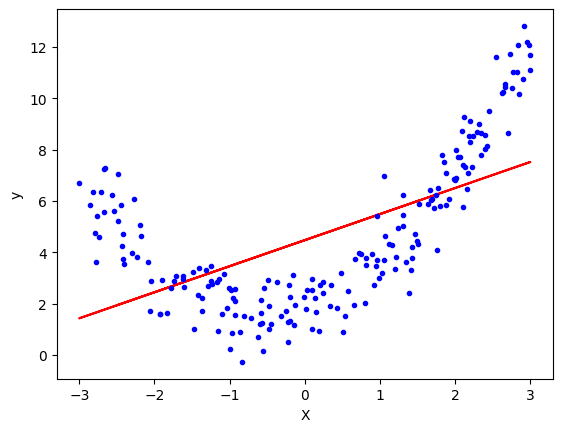

In [2]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
# Applying linear regression
lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [39]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_trans=poly.fit_transform(X_train)
X_test_trans=poly.transform(X_test)

In [40]:
ir2=LinearRegression()
ir2.fit(X_train_trans,y_train)

LinearRegression()

In [41]:
y_pred=ir2.predict(X_test_trans)
r2_score(y_test,y_pred)



0.9132158280681275

In [42]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = ir2.predict(X_new_poly)


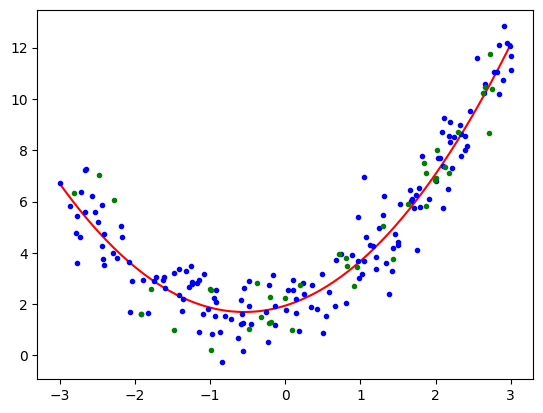

In [43]:
plt.plot(x_new,y_new,'r-')
plt.plot(X_train,y_train,'b.')
plt.plot(X_test,y_test,'g.')

In [49]:
def polynomial_regression(degree):
   X_new=np.linspace(-3, 3, 100).reshape(100, 1)
   X_new_poly = poly.transform(X_new)

   polybig_features=PolynomialFeatures(degree=degree,include_bias=False)
   std_scaler=StandardScaler()
   lin_reg=LinearRegression()
   polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
   polynomial_regression.fit(X, y)
   y_newbig = polynomial_regression.predict(X_new)
   plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

   plt.plot(X_train, y_train, "b.", linewidth=3)
   plt.plot(X_test, y_test, "g.", linewidth=3)
   plt.legend(loc="upper left")
   plt.xlabel("X")
   plt.ylabel("y")
   plt.axis([-3, 3, 0, 10])
   plt.show()



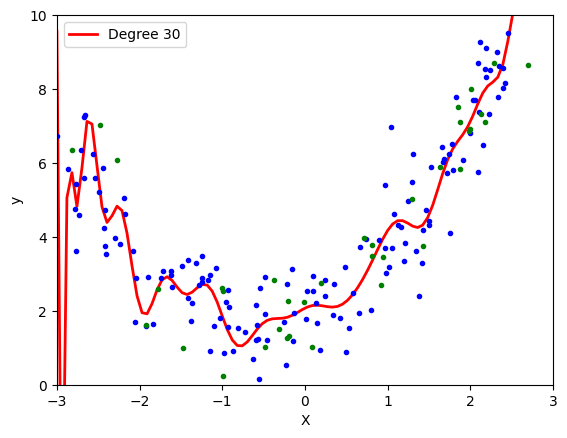

In [51]:
polynomial_regression(30)